In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Generate two random series as features(IV)
x_1=np.random.rand(500)
x_2=np.random.rand(500)

In [3]:
# Set y. The real decision boundary is drawed by function x2=square(x1).
# When points(x1,x2) are on the upper of the line, it belongs to (0), otherwise (1).
# You can always change the rule of seperation.
y=[]
for x1,x2 in zip(x_1,x_2):
    if x1>=x2**0.5:
        v=1
    else:
        v=0
    y.append(v)

In [4]:
# Combine x1, x2 and y to a dataframe:
df=pd.DataFrame({'y':y,'x1':x_1,'x2':x_2})

In [5]:
# Train data and test data
train_df=df.loc[:449]
test_df=df.loc[450:]

In [6]:
# Create features:
x_train=train_df[['x1','x2']]
x_train['x2_sr']=x_train['x2']**0.5
x_train['c']=1
x_train=x_train.drop('x2',axis=1)
y_train=train_df['y']

In [7]:
# Transform datas to matrix
x=np.mat(x_train)
y=np.transpose(np.mat(y_train))
theta=np.mat([[0],[0],[0]])

In [8]:
# Define sigmoid function
def sig(x,theta):
    h=1/(1+np.exp(-(x*theta)))
    return h

In [9]:
# Set learning rate alpha and run gradient descent 2500 times
# Calculate cost function every time
alpha=0.001
costs=[]
iterate=list(range(1800))
for i in iterate:
    h=sig(x,theta)
    theta=theta-alpha*x.T.dot((sig(x,theta)-y))
    cost=(-y.T.dot(np.log(sig(x,theta)))-(1-y).T.dot(np.log(1-(sig(x,theta)))))/len(y_train)
    cost_v=cost.item(0)
    costs.append(cost_v)

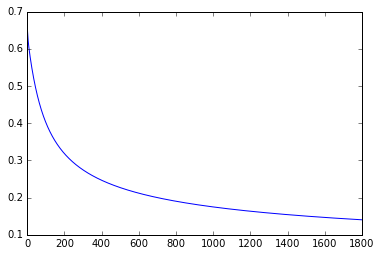

In [10]:
# Plot cost function along with iterate times
plt.plot(iterate,costs)
plt.show()

In [11]:
# Get estimated theta
theta

matrix([[ 11.11800761],
        [-10.85379608],
        [ -0.46349111]])

In [12]:
# Predict y by x from train data
pred_ty=[]
h_test=sig(x,theta)
for h in h_test:
    if h>=0.5:
        v=1
    else:
        v=0
    pred_ty.append(v)
# make a score to see how well the model fit
count_train=0
true_ty=train_df['y']
for ty,py in zip(true_ty,pred_ty):
    if ty==py:
        count_train+=1
score=count_train/len(true_ty)
print('The prediciton score is:',score)

The prediciton score is: 0.9777777777777777


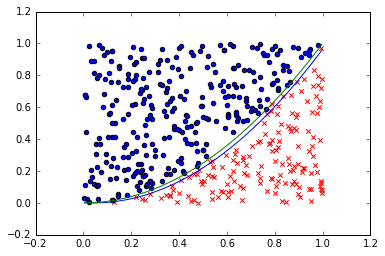

In [13]:
# Plot data and decision boundary(blue one is estimated, green is real)
sort_x=np.sort(train_df['x1'])
db=(theta.item(0)*sort_x/theta.item(1)+theta.item(2)/theta.item(1))**2
real_db=sort_x**2
xy1=train_df[train_df['y']==1]
xy0=train_df[train_df['y']==0]
fig=plt.figure()
plt.scatter(xy1['x1'],xy1['x2'],marker='x',c='red')
plt.scatter(xy0['x1'],xy0['x2'],marker='o',c='blue')
plt.plot(sort_x,db)
plt.plot(sort_x,real_db,c='green')
plt.show()

In [14]:
# Predict y by using x from test data
test_x_m=test_df.drop('y',axis=1)
test_x_m['x2_sr']=test_x_m['x2']**0.5
test_x_m['c']=1
test_x_m=test_x_m.drop('x2',axis=1)
x_test=x=np.mat(test_x_m)
pred_y=[]
h_test=sig(x_test,theta)
for h in h_test:
    if h>=0.5:
        v=1
    else:
        v=0
    pred_y.append(v)

In [15]:
# Make a score to see how well the model fit
count=0
true_y=test_df['y']
for ty,py in zip(true_y,pred_y):
    if ty==py:
        count+=1
score=count/len(true_y)
print('The prediciton score is:',score)
pred_df=test_df.drop('y',axis=1)
ys=pd.Series(pred_y)
pred_df['y']=ys.values

The prediciton score is: 1.0


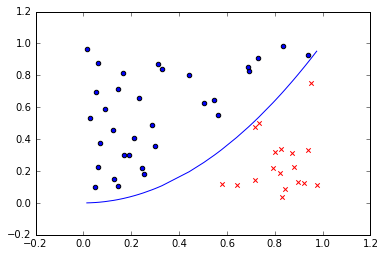

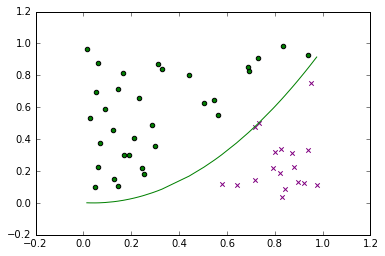

In [17]:
# Plot predict and true values
sort_xt=np.sort(test_df['x1'])
xyr1=test_df[test_df['y']==1]
xyr0=test_df[test_df['y']==0]
xyp1=pred_df[pred_df['y']==1]
xyp0=test_df[pred_df['y']==0]
db=(theta.item(0)*sort_xt/theta.item(1)+theta.item(2)/theta.item(1))**2
real_db=sort_xt**2

fig1=plt.figure()
plt.scatter(xyr1['x1'],xyr1['x2'],marker='x',c='red')
plt.scatter(xyr0['x1'],xyr0['x2'],marker='o',c='blue')
plt.plot(sort_xt,real_db)
fig2=plt.figure()
plt.scatter(xyp1['x1'],xyp1['x2'],marker='x',c='purple')
plt.scatter(xyp0['x1'],xyp0['x2'],marker='o',c='green')
plt.plot(sort_xt,db,c='green')

plt.show()


In [18]:
test_df['pred_y']=ys.values
print(test_df)

           x1        x2  y  pred_y
450  0.735173  0.500313  1       1
451  0.061652  0.877153  0       0
452  0.145435  0.107183  0       0
453  0.328668  0.841326  0       0
454  0.287211  0.491055  0       0
455  0.825380  0.338712  1       1
456  0.504024  0.627649  0       0
457  0.820674  0.188871  1       1
458  0.192235  0.301021  0       0
459  0.940975  0.930855  0       0
460  0.922808  0.127674  1       1
461  0.802247  0.320725  1       1
462  0.879539  0.228081  1       1
463  0.014373  0.962516  0       0
464  0.640355  0.115025  1       1
465  0.212642  0.409544  0       0
466  0.732041  0.908171  0       0
467  0.029063  0.533624  0       0
468  0.873753  0.313351  1       1
469  0.231468  0.656658  0       0
470  0.694061  0.830409  0       0
471  0.169888  0.298550  0       0
472  0.953496  0.749752  1       1
473  0.689180  0.853842  0       0
474  0.089371  0.586610  0       0
475  0.062774  0.227861  0       0
476  0.442321  0.800117  0       0
477  0.833949  0.982

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
